# 선형 모델과 규제화 L2, L2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

import seaborn as sns
titanic_data = sns.load_dataset('titanic')

# Preprocess the data
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})
titanic_data['embarked'] = titanic_data['embarked'].map({'S': 0, 'C': 1, 'Q': 2}).fillna(-1)
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['fare'].fillna(titanic_data['fare'].median(), inplace=True)

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = titanic_data[features]
y = titanic_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Convert predictions to binary (0 or 1)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy of Ridge model: {accuracy}")



Accuracy of Ridge model: 0.776536312849162


/tmp/ipykernel_18463/2959587632.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
/tmp/ipykernel_18463/2959587632.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

ROC AUC Score: 0.7857786357786358
Accuracy: 0.6256983240223464


/tmp/ipykernel_18463/1104634561.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
/tmp/ipykernel_18463/1104634561.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

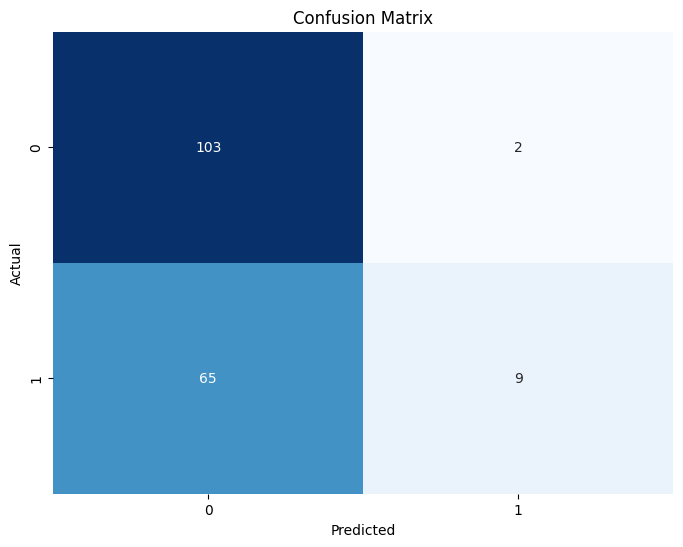

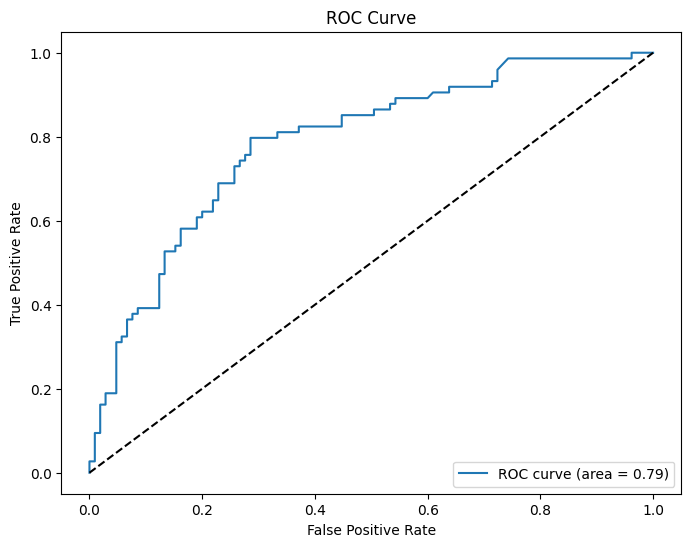

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = sns.load_dataset('titanic')

# Preprocess the data
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})
titanic_data['embarked'] = titanic_data['embarked'].map({'S': 0, 'C': 1, 'Q': 2}).fillna(-1)
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['fare'].fillna(titanic_data['fare'].median(), inplace=True)

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = titanic_data[features]
y = titanic_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train an ElasticNet model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42) # You might need to tune alpha and l1_ratio
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_class = np.round(y_pred) #Round predictions to 0 or 1 for classification


# Evaluate the model
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Accuracy:", np.mean(y_pred_class == y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()